In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


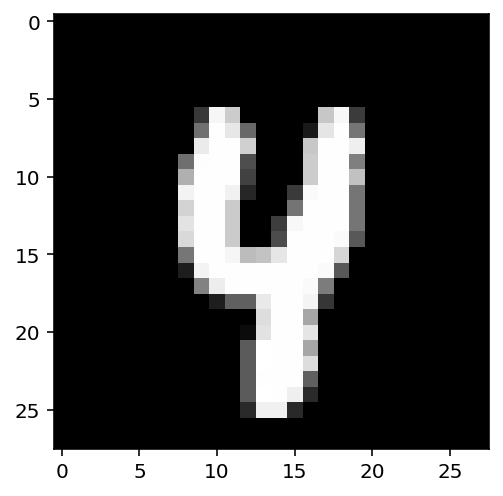

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [7]:
def activation(x):
    """ Sigmoid activation function 
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

### Neural network
def multi_Layer_NW(inputUnits, hiddenUnits, outputUnits):
    torch.manual_seed(7) # Set the random seed so things are predictable

    # Define the size of each layer in our network
    n_input = inputUnits     # Number of input units, must match number of input features
    n_hidden = hiddenUnits   # Number of hidden units 
    n_output = outputUnits   # Number of output units

    # Weights for inputs to hidden layer
    W1 = torch.randn(n_input, n_hidden)
    # Weights for hidden layer to output layer
    W2 = torch.randn(n_hidden, n_output)

    # and bias terms for hidden and output layers
    B1 = torch.randn((1, n_hidden))
    B2 = torch.randn((1, n_output))

    return W1,W2,B1,B2

def calc_output(features,W1,W2,B1,B2):
    h = activation(torch.matmul(features,W1).add_(B1))
    output = activation(torch.matmul(h,W2).add_(B2))
    return output

# Features are flattened batch input
features = torch.flatten(images,start_dim=1)
W1,W2,B1,B2 = multi_Layer_NW(features.shape[1],256,10)

out = calc_output(features,W1,W2,B1,B2) 
# output of your network, should have shape (64,10)

In [11]:
def softmax(x):
    ## TODO: Implement the softmax function here
    nr = torch.exp(x) 
    dr = torch.sum(torch.exp(x))
    return nr/dr
     

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([0.0137, 0.0172, 0.0151, 0.0158, 0.0163, 0.0159, 0.0146, 0.0140, 0.0133,
        0.0159, 0.0153, 0.0145, 0.0164, 0.0175, 0.0152, 0.0186, 0.0165, 0.0159,
        0.0163, 0.0154, 0.0159, 0.0154, 0.0163, 0.0152, 0.0169, 0.0142, 0.0160,
        0.0155, 0.0158, 0.0150, 0.0173, 0.0152, 0.0160, 0.0163, 0.0173, 0.0178,
        0.0138, 0.0147, 0.0149, 0.0157, 0.0156, 0.0181, 0.0174, 0.0175, 0.0127,
        0.0152, 0.0119, 0.0148, 0.0170, 0.0135, 0.0165, 0.0146, 0.0138, 0.0152,
        0.0149, 0.0170, 0.0167, 0.0157, 0.0175, 0.0145, 0.0144, 0.0144, 0.0165,
        0.0161])


In [12]:
from torch import nn

In [13]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [14]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [16]:
def Relu(x):
    if x < 0:
        return 0
    else:
        return x

class Network(nn.ReLU):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
        # Define sigmoid activation and softmax output 
        self.Relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.Relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        
        return x

In [18]:
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (Relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [19]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0019,  0.0005, -0.0266,  ...,  0.0021,  0.0257,  0.0180],
        [-0.0291,  0.0194,  0.0033,  ..., -0.0058, -0.0152, -0.0074],
        [-0.0255,  0.0141, -0.0173,  ..., -0.0066,  0.0269,  0.0035],
        ...,
        [-0.0114,  0.0222,  0.0197,  ...,  0.0243,  0.0304,  0.0111],
        [-0.0090, -0.0345, -0.0355,  ..., -0.0130,  0.0239, -0.0339],
        [ 0.0088,  0.0205,  0.0327,  ..., -0.0091,  0.0315,  0.0055]],
       requires_grad=True)
Parameter containing:
tensor([-0.0006, -0.0100,  0.0276, -0.0134, -0.0039,  0.0245, -0.0207,  0.0039,
        -0.0155,  0.0004,  0.0028, -0.0305,  0.0163,  0.0109, -0.0037,  0.0187,
         0.0095,  0.0269, -0.0096, -0.0019, -0.0355,  0.0344,  0.0178, -0.0305,
        -0.0307, -0.0113, -0.0355,  0.0336, -0.0058, -0.0032,  0.0309,  0.0017,
         0.0203, -0.0101,  0.0036, -0.0251, -0.0256, -0.0087,  0.0092, -0.0355,
         0.0127, -0.0146, -0.0254, -0.0126, -0.0269,  0.0212,  0.0112, -0.0237,
         0.0278

In [20]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0013, -0.0097, -0.0107,  ...,  0.0088, -0.0066,  0.0040],
        [-0.0093,  0.0021,  0.0107,  ...,  0.0003,  0.0007,  0.0027],
        [ 0.0085, -0.0038,  0.0023,  ..., -0.0218, -0.0126,  0.0017],
        ...,
        [ 0.0034, -0.0230,  0.0046,  ...,  0.0049, -0.0056,  0.0109],
        [-0.0020,  0.0027, -0.0104,  ...,  0.0089, -0.0030,  0.0080],
        [ 0.0027,  0.0078, -0.0043,  ..., -0.0089,  0.0020,  0.0119]])

In [23]:

# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
#helper.view_classify(img.view(1, 28, 28), ps)

In [25]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
#helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [26]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0258, -0.0197, -0.0157,  ...,  0.0183,  0.0023,  0.0127],
        [-0.0313, -0.0259,  0.0099,  ...,  0.0077,  0.0205,  0.0154],
        [-0.0172,  0.0355,  0.0300,  ..., -0.0161,  0.0344,  0.0047],
        ...,
        [-0.0053, -0.0235,  0.0098,  ...,  0.0118,  0.0093,  0.0099],
        [-0.0284,  0.0123,  0.0334,  ...,  0.0231, -0.0201, -0.0338],
        [-0.0129,  0.0119,  0.0206,  ...,  0.0095, -0.0266,  0.0272]],
       requires_grad=True)

In [27]:

from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [28]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
